### Install Libraries

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import plotly.express as px
import yfinance as yf

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('seaborn')

### Download Data - Petrobras

Our data is based in company stocks Petróleo Brasileiro S.A. — Petrobras (PETR4.SA).

In [2]:
series_petr4 = yf.download("PETR4.SA", start="2015-01-01", end="2020-10-02")

[*********************100%***********************]  1 of 1 completed


In [3]:
series_petr4.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,9.99,9.99,9.35,9.36,8.683293,49559500
2015-01-05,9.14,9.19,8.53,8.56,7.941135,78385100
2015-01-06,8.71,8.83,8.04,8.28,7.681378,84723300
2015-01-07,8.56,8.73,8.36,8.67,8.043181,85531000
2015-01-08,8.79,9.39,8.74,9.23,8.562695,83306300


#### Times Series Visualization - Dynamics with range per date
#### OPEN

#### Exploratory Analysis - Distribution Analysis
#### OPEN

Plot of a histrogram graph for identify if the data has a Gaussian shape distribution.

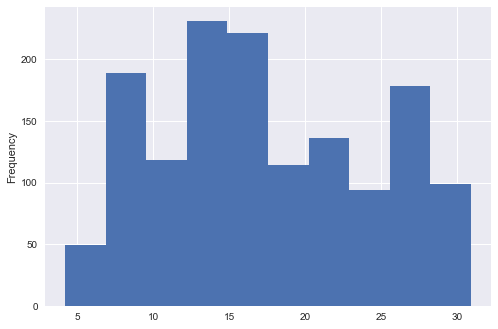

In [4]:
series_petr4["Open"].plot(kind="hist")
plt.show()

### Test - Augmented Dickey-Fuller

Statistical tests make strongs supositions about your data. They only can be used to inform the extent to which the null hypothesis can be rejected or fail to be rejected. The result must be interpreter for a given problem to be significant.

However, they can be provide a quickly verification and confirmatory evidences that your time series <b>is stationary or not.</b>The test <b>Augmented Dickey-Fuller</b> is a type of a statistical test that is very useful for this kind of analysis

<br>
<hr>
<br>
<b>Null Hypothesis (H0)</b> : If don't be rejected, suggests that time series has a unit root, which means that it's not stationary. There is some structure dependent of time.<br><br>

<b>Alternative Hypothesis (H1)</b> : the null hypothesis is rejected; suggests that the time series doesn't have a unit root, which means it's stationary. There isn't structure dependent of time.

<br>
<hr>
<br>
<b>We interpreter this result using p-value of test. One p-value below a limit (as 5% or 1%) suggests that we should reject the null hypothesis (stationary); otherwise, a p-value above suggests that we fail in reject the null hypothesis (non-stationary).</b>
<br><br>
<ul>
<li><b>p-value > 0,05</b> : fail in reject the null hypothesis (H0), the data has a unit root and are <b>not stationary.</b></li>

<li><b>p-value <= 0,05</b> : reject the null hypothesis (H0), the data doesn't have a unit root and are <b> stationary.</b></li>
</ul>

<br>
<hr>
<br>
Below is an example of the test <b>Augmented Dickey-Fuller</b> in stock data from Petrobras. The librarie <b>statsmodels</b> provides the function <b>adfuller()</b> that implements the test.

In [5]:
from statsmodels.tsa.stattools import adfuller

X = series_petr4["Open"]

result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.056293
p-value: 0.262449


The example tell us the statistical value of <b>-2.05</b>.

The more negative this statistic, bigger the likelihood of we reject the null hypothesis (we have a stationary data).

Otherwise, if we don't reject the null hypothesis (we have a stationary data).
<br><hr><br>
Validating p-value we have the value of <b>0.26</b>, that is <br>

<b>Value 0.26 > 0,05</b> : fail to reject the null hypothesis (H0), soon the data has a unit root and <b>are not stationary.</b>

<br>